In [1]:
import json

from transformers import AutoTokenizer, AutoModel, BertLMHeadModel, BertForMaskedLM
import torch
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, cosine_similarity
from unidecode import unidecode

In [2]:
# load tokenizer and model using bert romanian cased model
# https://github.com/dumitrescustefan/Romanian-Transformers
# https://huggingface.co/dumitrescustefan/bert-base-romanian-cased-v1

tokenizer = AutoTokenizer.from_pretrained("dumitrescustefan/bert-base-romanian-cased-v1")
model = AutoModel.from_pretrained("dumitrescustefan/bert-base-romanian-cased-v1")

Some weights of the model checkpoint at dumitrescustefan/bert-base-romanian-cased-v1 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
# load tokenizer and model using bert romanian cased model
# https://github.com/dumitrescustefan/Romanian-Transformers
# https://huggingface.co/dumitrescustefan/bert-base-romanian-cased-v1

BERT_RO_UNCASED = "dumitrescustefan/bert-base-romanian-uncased-v1"

tokenizer = AutoTokenizer.from_pretrained(BERT_RO_UNCASED)

model = AutoModel.from_pretrained(BERT_RO_UNCASED)
model2 = BertLMHeadModel.from_pretrained(BERT_RO_UNCASED)
model3 = BertForMaskedLM.from_pretrained(BERT_RO_UNCASED)

Some weights of the model checkpoint at dumitrescustefan/bert-base-romanian-uncased-v1 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`
Some weights of t

In [4]:
data = pd.read_pickle("data.pkl")

In [5]:
def create_embeddings(model, data):
    embeddings = []
    for doc in data:
        _tokens = tokenizer.encode(doc, add_special_tokens=True, return_tensors="pt")
#         for k in _tokens:
#             print(tokenizer.decode(k))
        _tokens_embeddings = model(_tokens)[0]
        _tokens_embeddings_mean = np.mean(_tokens_embeddings.detach().numpy().squeeze(), axis=0)
        embeddings.append(_tokens_embeddings_mean)
    embeddings = np.array(embeddings)
    return embeddings

In [6]:
embeddings = create_embeddings(model, data.description)
clean_embeddings = create_embeddings(model, data.clean_description)
clean_embeddings2 = create_embeddings(model, data.clean_description2)
clean_embeddings3 = create_embeddings(model, data.clean_description3)
clean_embeddings4 = create_embeddings(model, data.clean_description4)

In [7]:
def get_similarity_matrix(embeddings, metric=cosine_distances):
    x = pd.DataFrame(metric(embeddings, embeddings))    
    x =x.round(decimals=2)
    
    mask = np.triu(x.corr())
    mask = None

    fig, ax = pyplot.subplots(figsize=(15,15))
    ax.hlines([3, 6, 9], *ax.get_xlim())

    cmap = sns.cm.rocket_r
    sns.heatmap(x, linewidth=0.5, annot=True, ax=ax, cmap=cmap, mask=mask)
    
    return x

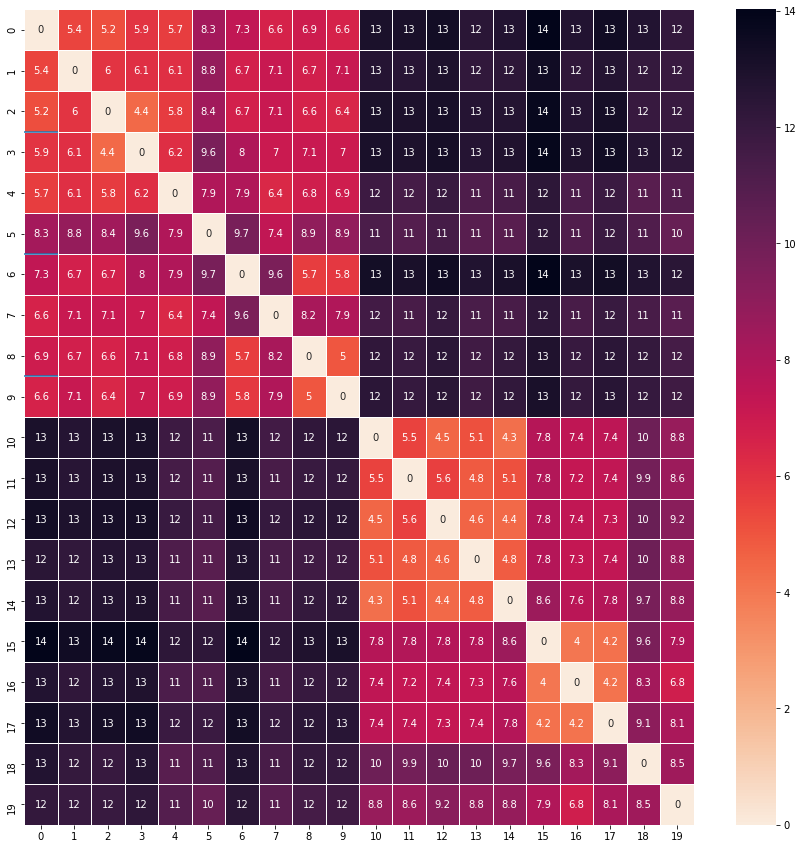

In [8]:
m = get_similarity_matrix(embeddings, euclidean_distances)

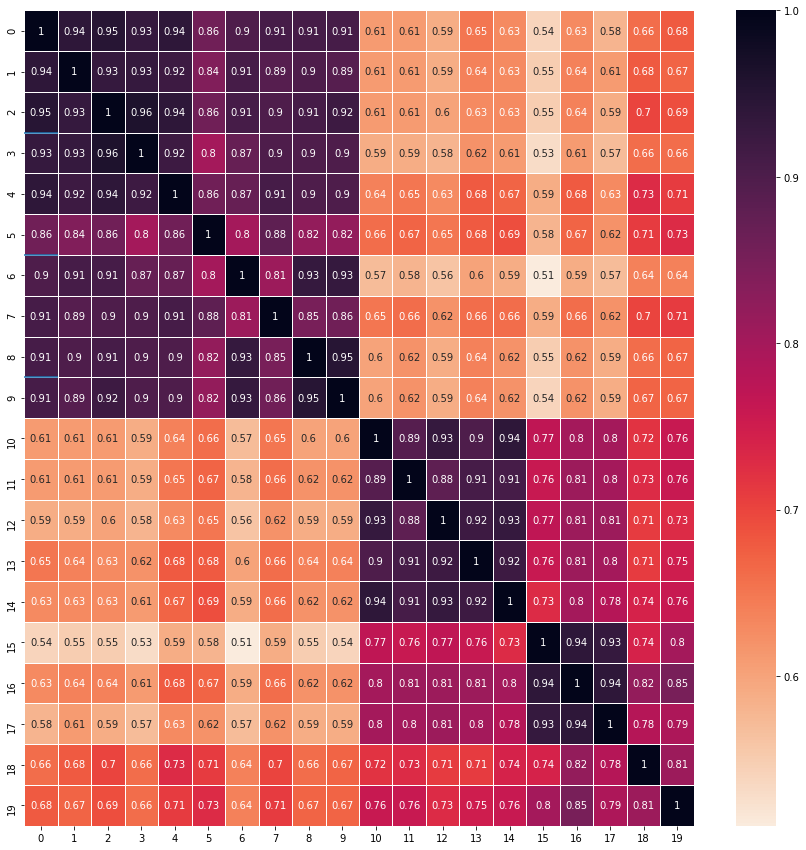

In [9]:
m = get_similarity_matrix(embeddings, cosine_similarity)

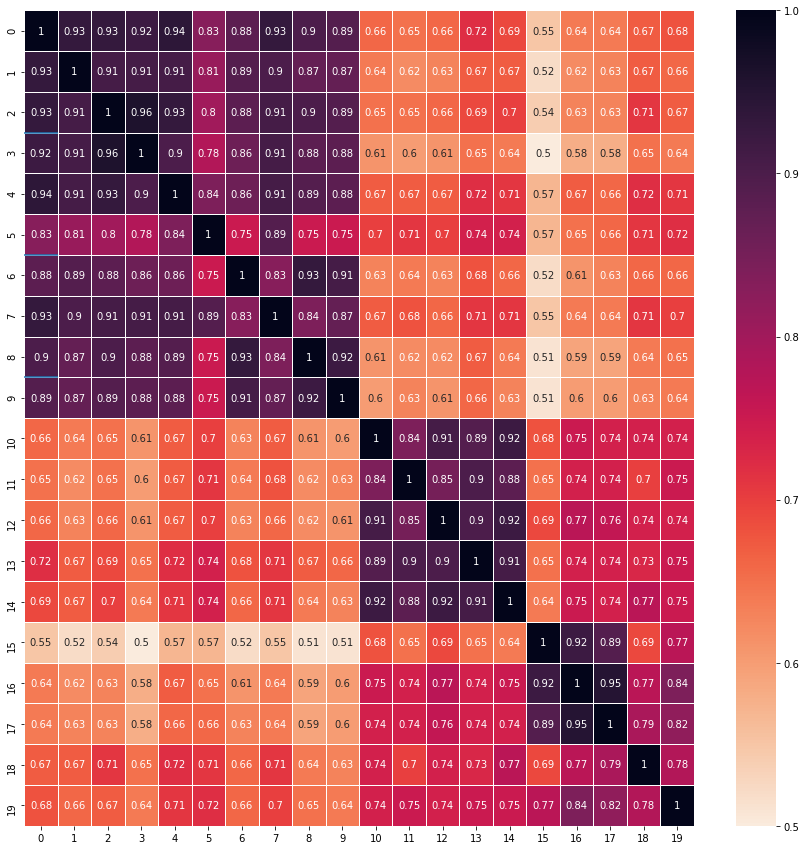

In [10]:
m = get_similarity_matrix(clean_embeddings, cosine_similarity)

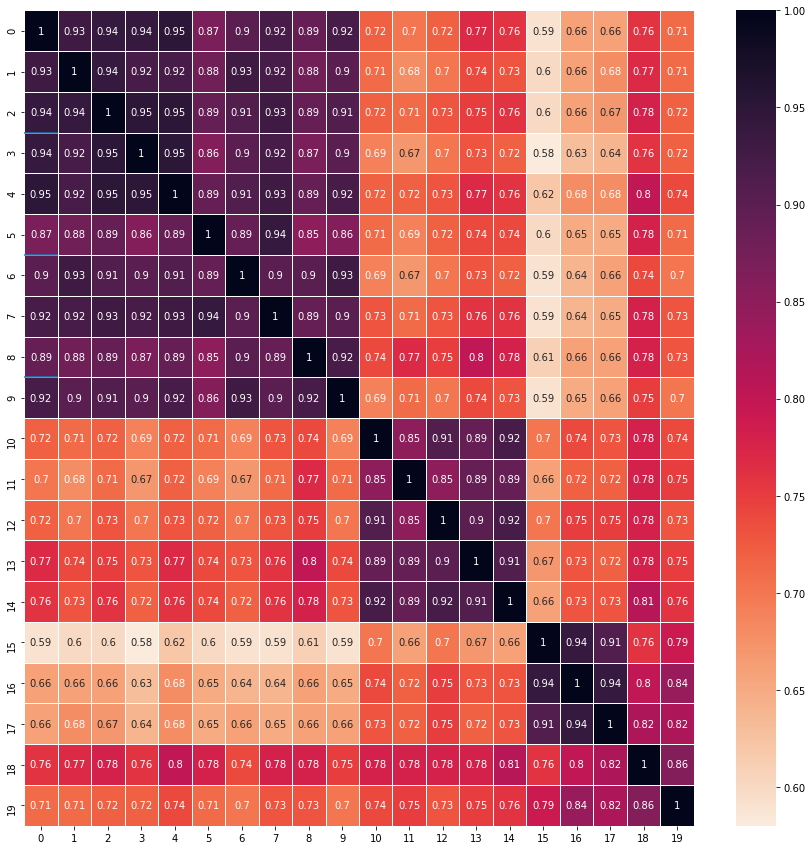

In [11]:
m = get_similarity_matrix(clean_embeddings2, cosine_similarity)

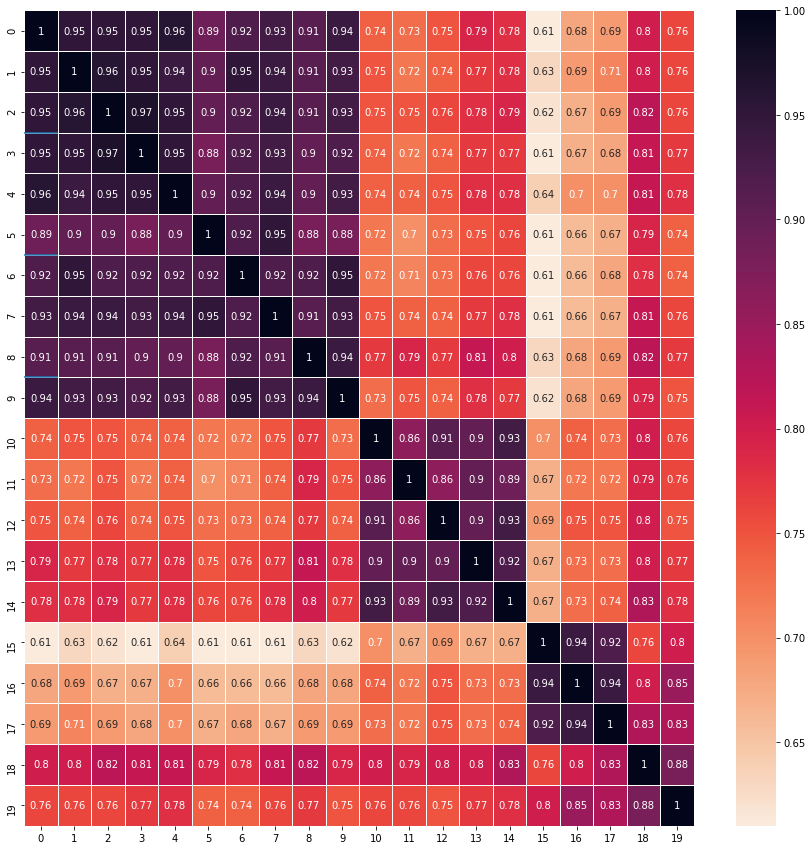

In [12]:
m = get_similarity_matrix(clean_embeddings3, cosine_similarity)

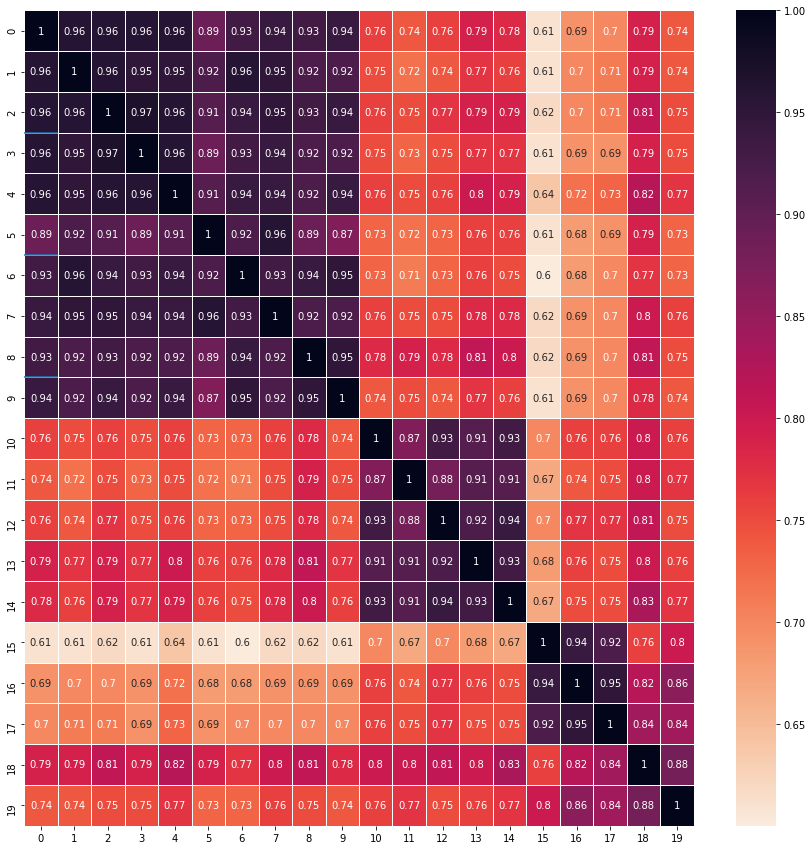

In [13]:
m = get_similarity_matrix(clean_embeddings4, cosine_similarity)

In [14]:
true_labels = ["pizza"]*5 + ["paste"]*5 + ["book"]*5 + ["dipers"]*5

for _embeddings in [embeddings, clean_embeddings, clean_embeddings2, clean_embeddings3, clean_embeddings4]:
    acc = 0
    for embedding, label in zip(_embeddings, true_labels):
        acc += (data.iloc[np.argsort(cosine_distances([embedding], _embeddings)).squeeze()].category[:5] == label).sum()/5
    #     print(acc)
    acc = acc/len(embeddings)
    print(acc)  # We get top5 sinmilarity with an accuracy of 79%

0.8300000000000001
0.8100000000000002
0.85
0.86
0.8699999999999999


In [15]:
embeddingslm = create_embeddings(model2, data.description)
clean_embeddingslm = create_embeddings(model2, data.clean_description)
clean_embeddingslm2 = create_embeddings(model2, data.clean_description2)
clean_embeddingslm3 = create_embeddings(model2, data.clean_description3)
clean_embeddingslm4 = create_embeddings(model2, data.clean_description4)

In [16]:
true_labels = ["pizza"]*5 + ["paste"]*5 + ["book"]*5 + ["dipers"]*5

for _embeddings in [embeddingslm, clean_embeddingslm, clean_embeddingslm2, clean_embeddingslm3, clean_embeddingslm4]:
    acc = 0
    for embedding, label in zip(_embeddings, true_labels):
        acc += (data.iloc[np.argsort(cosine_distances([embedding], _embeddings)).squeeze()].category[:5] == label).sum()/5
    #     print(acc)
    acc = acc/len(embeddings)
    print(acc)  # We get top5 sinmilarity with an accuracy of 79%

0.8100000000000002
0.8400000000000001
0.8899999999999999
0.9
0.8799999999999999


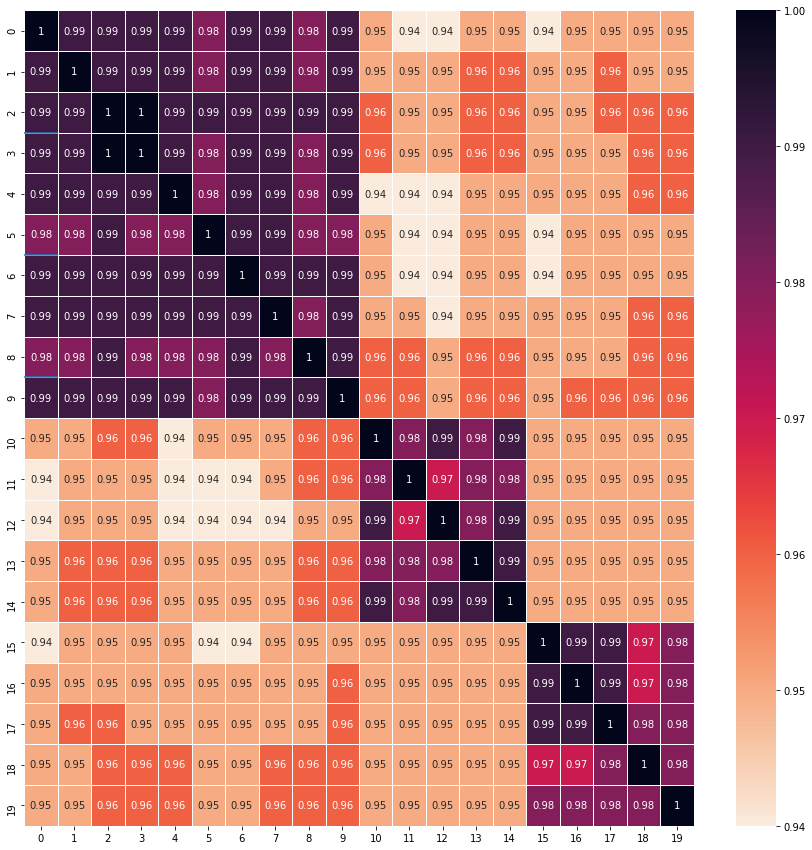

In [17]:
m = get_similarity_matrix(clean_embeddingslm3, cosine_similarity)

In [18]:
# Similar with model2, comment out for the moment, for redability

# model3 = BertForMaskedLM.from_pretrained(BERT_RO_UNCASED)

# embeddingsmlm = create_embeddings(model3, data.description)
# clean_embeddingsmlm = create_embeddings(model3, data.clean_description)
# clean_embeddingsmlm2 = create_embeddings(model3, data.clean_description2)
# clean_embeddingsmlm3 = create_embeddings(model3, data.clean_description3)
# clean_embeddingsmlm4 = create_embeddings(model3, data.clean_description4)

In [19]:
# true_labels = ["pizza"]*5 + ["paste"]*5 + ["book"]*5 + ["dipers"]*5

# for _embeddings in [embeddingsmlm, clean_embeddingsmlm, clean_embeddingsmlm2, clean_embeddingsmlm3, clean_embeddingsmlm4]:
#     acc = 0
#     for embedding, label in zip(_embeddings, true_labels):
#         acc += (data.iloc[np.argsort(cosine_distances([embedding], _embeddings)).squeeze()].category[:5] == label).sum()/5
#     #     print(acc)
#     acc = acc/len(embeddings)
#     print(acc)  # We get top5 sinmilarity with an accuracy of 79%

In [20]:
# m = get_similarity_matrix(clean_embeddingsmlm3, cosine_similarity)